In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries and Load csv file in to DataFrame.

In [ ]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
import seaborn as sns
import datetime as dt

# Extract and Load csv file into pandas DataFrame.
with gzip.open('/content/drive/MyDrive/Project Folder/listings.csv.gz') as file:
  listings = pd.read_csv(file)
with gzip.open('/content/drive/MyDrive/Project Folder/reviews.csv.gz') as file:
  reviews = pd.read_csv(file)

# View the dataset dimensions
print(listings.shape)
print(reviews.shape)

(17396, 75)
(290946, 6)


In [ ]:
# Preview the data features and make decision of which feature to take into analysis.
print(listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

## Simplify the dataset to remove out of scope information.

In [ ]:
# Subset the columns needed for analysis and Visualization.
listings_simp = listings.loc[:, ['id', 'name', 'host_id', 'host_name', 'neighbourhood_cleansed', 'latitude',
                                 'longitude','property_type', 'room_type', 'price', 'minimum_nights',
                                 'number_of_reviews', 'number_of_reviews_ltm', 'first_review','last_review',
                                 'review_scores_rating', 'license', 'calculated_host_listings_count',
                                 'reviews_per_month']]

# List out 5 random observations.                                 
listings_simp.sample(n=5)                                

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,license,calculated_host_listings_count,reviews_per_month
12419,19134670,The Prima Residence # STANDARD ROOM,126528166,The Prima,Don Mueang,13.91384,100.59190,Private room in rental unit,Private room,"$1,090.00",1,41,0,2017-06-22,2019-06-08,4.46,NaN,4,0.58
6271,11170133,1BR in CBD 100m to BTS ChongNonsri,56561719,Oom,Sathon,13.71945,100.53109,Entire rental unit,Entire home/apt,"$1,750.00",2,90,8,2016-02-29,2023-03-13,4.73,NaN,4,1.04
6268,760817662088119049,Bkk/BTS Surasak/温馨loft公寓3/免费泳池/健身房/WIFI/免费停车,260093182,Hoha,Sathon,13.71408,100.53268,Entire loft,Entire home/apt,"$1,336.00",1,7,7,2022-12-18,2023-02-14,4.57,NaN,20,2.06
8803,9008384,BRAND New Sukhumvit Condo Cozy BTS,6632570,Ethan,Vadhana,13.71301,100.59995,Entire condo,Entire home/apt,$850.00,6,35,6,2015-11-27,2023-02-26,4.62,NaN,1,0.39
5633,46268673,A 90sqm 2BR/2Bath where everything is 10 mins ...,127467502,Johnathan,Khlong Toei,13.72505,100.56459,Entire rental unit,Entire home/apt,"$1,500.00",3,10,9,2022-03-07,2023-02-25,4.70,NaN,4,0.77


In [ ]:
# Get the summary of datatypes.
listings_simp.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
price                              object
minimum_nights                      int64
number_of_reviews                   int64
number_of_reviews_ltm               int64
first_review                       object
last_review                        object
review_scores_rating              float64
license                           float64
calculated_host_listings_count      int64
reviews_per_month                 float64
dtype: object

# Correct the data types.
Look at the data types above. We see that a few columns needs to be converted to the correct type. Besides, the lincense column seem like doesn't have any data and should be remove.


In [ ]:
# Remove unnecessary characters and hange the data type of price column to numeric.
listings_simp['price'] = listings_simp['price'].str.replace('$', '',regex=True).str.replace(',', '', regex=True)
listings_simp['price'] = listings_simp['price'].astype('float')

# Change first_review and last_review to datetime type
listings_simp['first_review'] = pd.to_datetime(listings_simp['first_review'])
listings_simp['last_review'] = pd.to_datetime(listings_simp['last_review'])
                                              
# Remove license column
listings_simp.drop(columns='license', inplace=True)

# Review the data types to ensure changes has been made.
listings_simp.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_cleansed                    object
latitude                                 float64
longitude                                float64
property_type                             object
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
number_of_reviews_ltm                      int64
first_review                      datetime64[ns]
last_review                       datetime64[ns]
review_scores_rating                     float64
calculated_host_listings_count             int64
reviews_per_month                        float64
dtype: object

# Handle missing values

In [ ]:
# Looking at the summary of null values
listings_simp.isnull().sum()

id                                   0
name                                 8
host_id                              0
host_name                            0
neighbourhood_cleansed               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
number_of_reviews_ltm                0
first_review                      6182
last_review                       6182
review_scores_rating              6182
calculated_host_listings_count       0
reviews_per_month                 6182
dtype: int64

The name column is insignificant in our analysis so the null values in this column can be ignored. 
We can guest from the summary above that there is a big part of the dataset don't have both the number of reviews and review date information. So, we will change the null values in reviews_per_month column to zero to prevent error for further analysis. Besides, we will also drop the date columns.
The null values in the review_scores_rating can be ignored too.


In [ ]:
# Fill null with zero
listings_simp['reviews_per_month'].fillna(0, inplace=True)
listings_simp.drop(columns=['first_review', 'last_review'], inplace=True)

In [ ]:
# Have a statistical view of numerical data.
listings_simp.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,calculated_host_listings_count,reviews_per_month
count,1.739600e+04,1.739600e+04,17396.000000,17396.000000,17396.000000,17396.000000,17396.000000,17396.000000,11214.000000,17396.000000,17396.000000
mean,2.420969e+17,1.689798e+08,13.745011,100.560288,2887.079099,14.990458,16.724879,4.768682,4.597532,17.206369,0.603935
std,3.540119e+17,1.447823e+08,0.042415,0.049918,21082.749949,47.365327,40.879010,11.769515,0.742236,35.477404,1.103127
min,2.793400e+04,5.892000e+04,13.527300,100.329550,120.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.311423e+07,4.254649e+07,13.720098,100.530389,900.000000,1.000000,0.000000,0.000000,4.550000,1.000000,0.000000
50%,3.901822e+07,1.324732e+08,13.738630,100.562059,1384.000000,1.000000,2.000000,0.000000,4.800000,5.000000,0.130000
75%,6.888730e+17,2.648650e+08,13.758882,100.584982,2242.000000,14.000000,14.000000,5.000000,5.000000,17.000000,0.810000
max,8.564852e+17,5.070882e+08,13.953540,100.923440,1000000.000000,1115.000000,1379.000000,490.000000,5.000000,247.000000,39.580000


The currency in the price column seems like the monetary unit of Thailand, we will convert it to USD in this project.

In [ ]:
# Change the currency from (baht) to ($)
listings_simp['price'] = round(listings_simp['price']/34.47, 2)

# Check the price columns again.
print(listings_simp[['price']].describe())

# Print out the ratio of listings amount that have price under 300 (USD)
price_under_300 = listings_simp.loc[listings_simp['price']<300, :].shape[0]/listings_simp.shape[0]
print('Percentage of listings amount that have price under 300 is: {:.2%}.'.format(price_under_300))

              price
count  17396.000000
mean      83.756501
std      611.625982
min        3.480000
25%       26.110000
50%       40.150000
75%       65.040000
max    29010.730000
Percentage of listings amount that have price under 300 is: 98.18%.


We saw that the price range is very large, the average price is just around 84 dollars but there is a few host have the price that looks unreal (about 29000 dollars per night) for airbnb services. This issue may lead to bad visualization on distribution of price. Hence, we will only take the value smaller than 300 dollars of the price column to have the clearer view about the distribution and the average of airbnb rental price in Bangkok, Thailand.

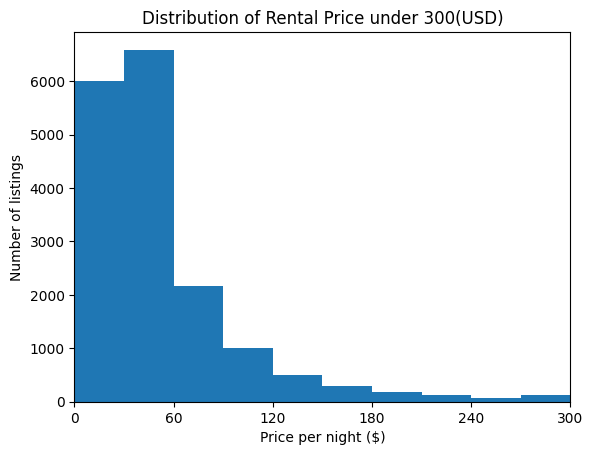

The average rental price is: 53.54($)


In [ ]:
# Subset a DataFrame contains number of listings have the price under 300 dollars per night
listings_price_under_300 = listings_simp.loc[listings_simp['price'] < 300 , :]
fig, ax = plt.subplots()
ax.hist(listings_price_under_300['price'], bins=np.linspace(0, 300, 11))
ax.set_xlabel('Price per night ($)')
ax.set_xticks(np.linspace(0, 300, 6))
ax.set_ylabel('Number of listings')
ax.set_title('Distribution of Rental Price under 300(USD)')
ax.margins(x=0)
plt.show()
print('The average rental price is: {}($)'.format(round(listings_price_under_300['price'].mean(), 2)))

From the Histogram, we see that about 90% of listings price is under 120 dollars per night, and the average is approximate 54 dollars.

## Find out the differences in number of listings and distribution of prices between room types.

In [ ]:
# See the number of each type of room
room_type_counts = listings_simp.groupby('room_type')['room_type'].count().sort_values(ascending=False).reset_index(name='count')
room_type_prices = listings_simp[['room_type', 'price']]
print(room_type_counts)

         room_type  count
0  Entire home/apt  10083
1     Private room   6176
2       Hotel room    629
3      Shared room    508


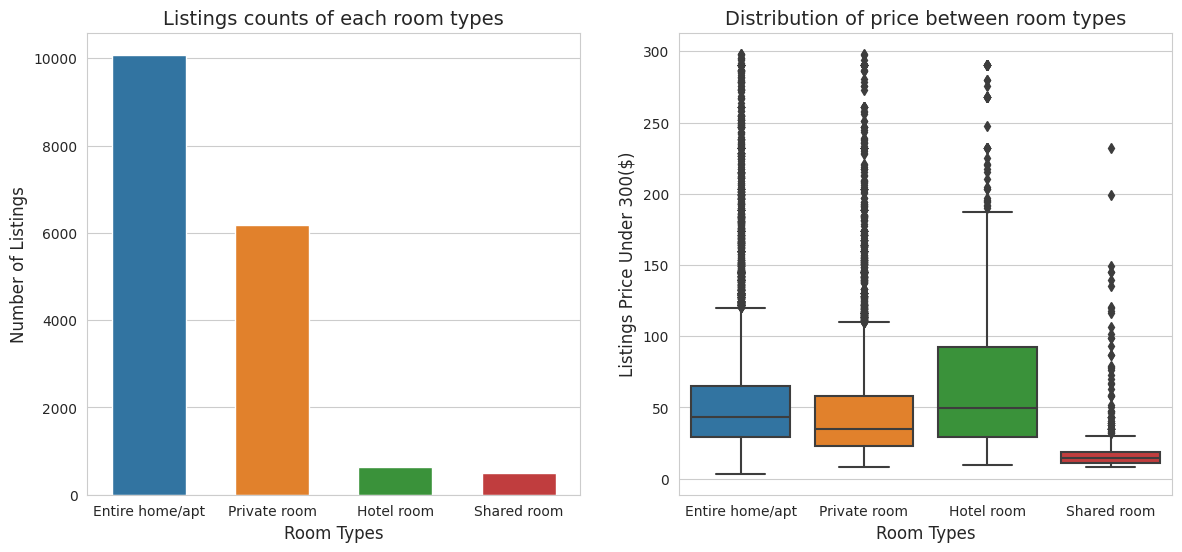

In [ ]:
# Set the style for visualization
sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# Plot the listings counts between type of rooms
barp = sns.barplot(x='room_type', y='count', data=room_type_counts, ax=ax1, width=0.6)
barp.set_title('Listings counts of each room types',fontsize=14)
barp.set_xlabel('Room Types', fontsize=12)
barp.set_ylabel('Number of Listings', fontsize=12)

# Plot the distribution
boxp = sns.boxplot(data=listings_price_under_300, x='room_type', y='price', order=['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'], ax=ax2)
boxp.set_title('Distribution of price between room types',fontsize=14)
boxp.set_xlabel('Room Types', fontsize=12)
boxp.set_ylabel('Listings Price Under 300($)', fontsize=12)
boxp.margins(y=0.05)
plt.show()

As can be seen from the plots, most of the listings were the entire home/apt type, . The private room is the second popular type, occupies about 35% of total listings. The hotel room and shared room may not be prefered by the airbnb host, hence these two type of room has a very small number of listings comparing to other types.

In the boxplot, the priced distribution of the most two popular type of rooms is almost the same: the average price is approximate 40(USD) per night and just a small amount of room is expensive than 120(USD). The shared room seems like the cheapest one in the four types.


# Top 10 popular property types

In [ ]:
# Count the number of each property types.
property_count = listings_simp['property_type'].value_counts()

# Create a DataFrame property types counts.
dic = {'prop_type':property_count.index,
       'count':property_count} 
property_count = pd.DataFrame(dic).reset_index(drop=True)

# Print out top the most 10 popular type.
property_count.head(10)

,prop_type,count
0,Entire rental unit,4878
1,Entire condo,3745
2,Private room in rental unit,1796
3,Room in hotel,879
4,Private room in condo,851
5,Private room in home,575
6,Room in boutique hotel,513
7,Entire home,512
8,Private room in hostel,387
9,Private room in serviced apartment,356


# How property type affect rental prices.

In [ ]:
# Check how many properties there are.
property_count.shape

(83, 2)

Because there are more than 80 different property types, it will be hard to get the insights if we create a visualization with such number of dimensions. Moreover, some property only appear a few times in the listings list, this will make our analysis don't have the generality. Thus, we will take out the property that have more than 50 appearances to analyze.

In [ ]:
# Filter out property types that have more than 50 counts.
property_count_mt50 = property_count[property_count['count'] >= 50]
listings_property_mt50 = listings_price_under_300[listings_price_under_300['property_type'].isin(property_count_mt50['prop_type'])]
listings_property_mt50.shape

(16537, 16)

[]

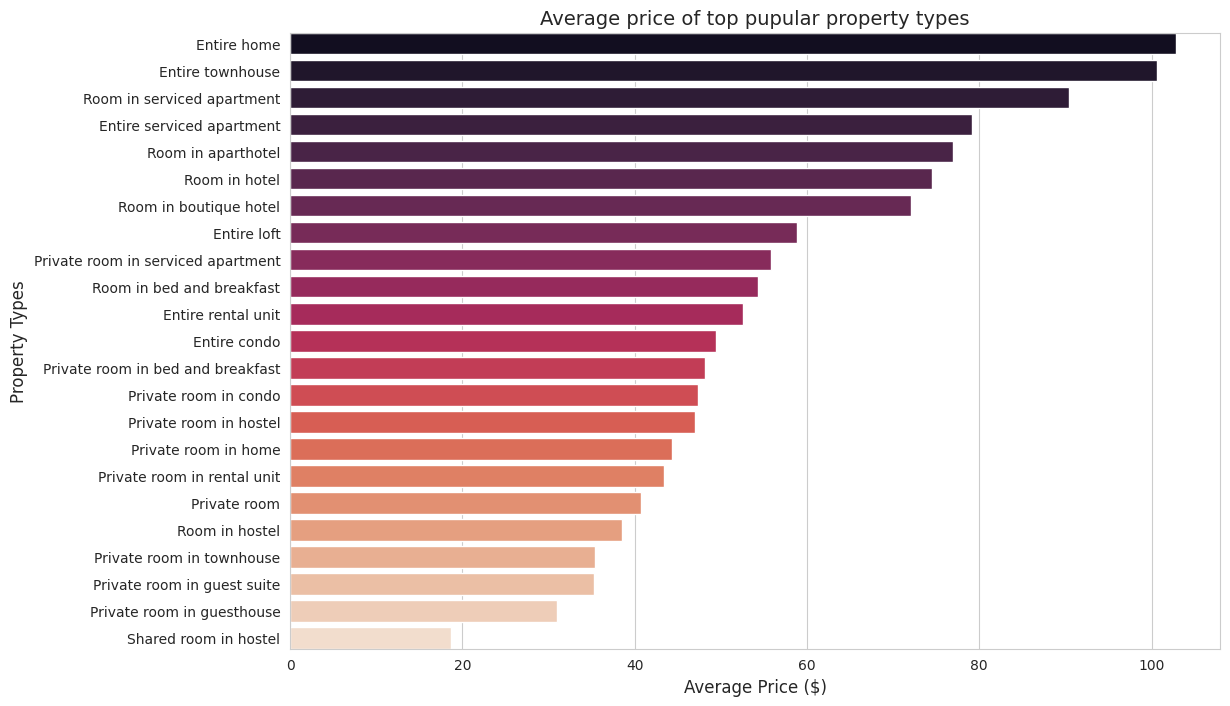

In [ ]:
# List out top 20 property types have highest average price.
prop_price = listings_property_mt50.groupby('property_type').agg({'price':'mean'}).reset_index()
prop_price.columns = ['prop_type', 'avg_price']
prop_price = prop_price.sort_values('avg_price', ascending=False)

# Create a barplot that indicates the average price of each property type.
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
prop_p = sns.barplot(data=prop_price, y='prop_type', x='avg_price', orient='h', palette='rocket')
prop_p.set_title('Average price of top pupular property types',fontsize=14)
prop_p.set_ylabel('Property Types', fontsize=12)
prop_p.set_xlabel('Average Price ($)', fontsize=12)
plt.margins(y=0)
plt.plot()

# Prices for different room and property types.

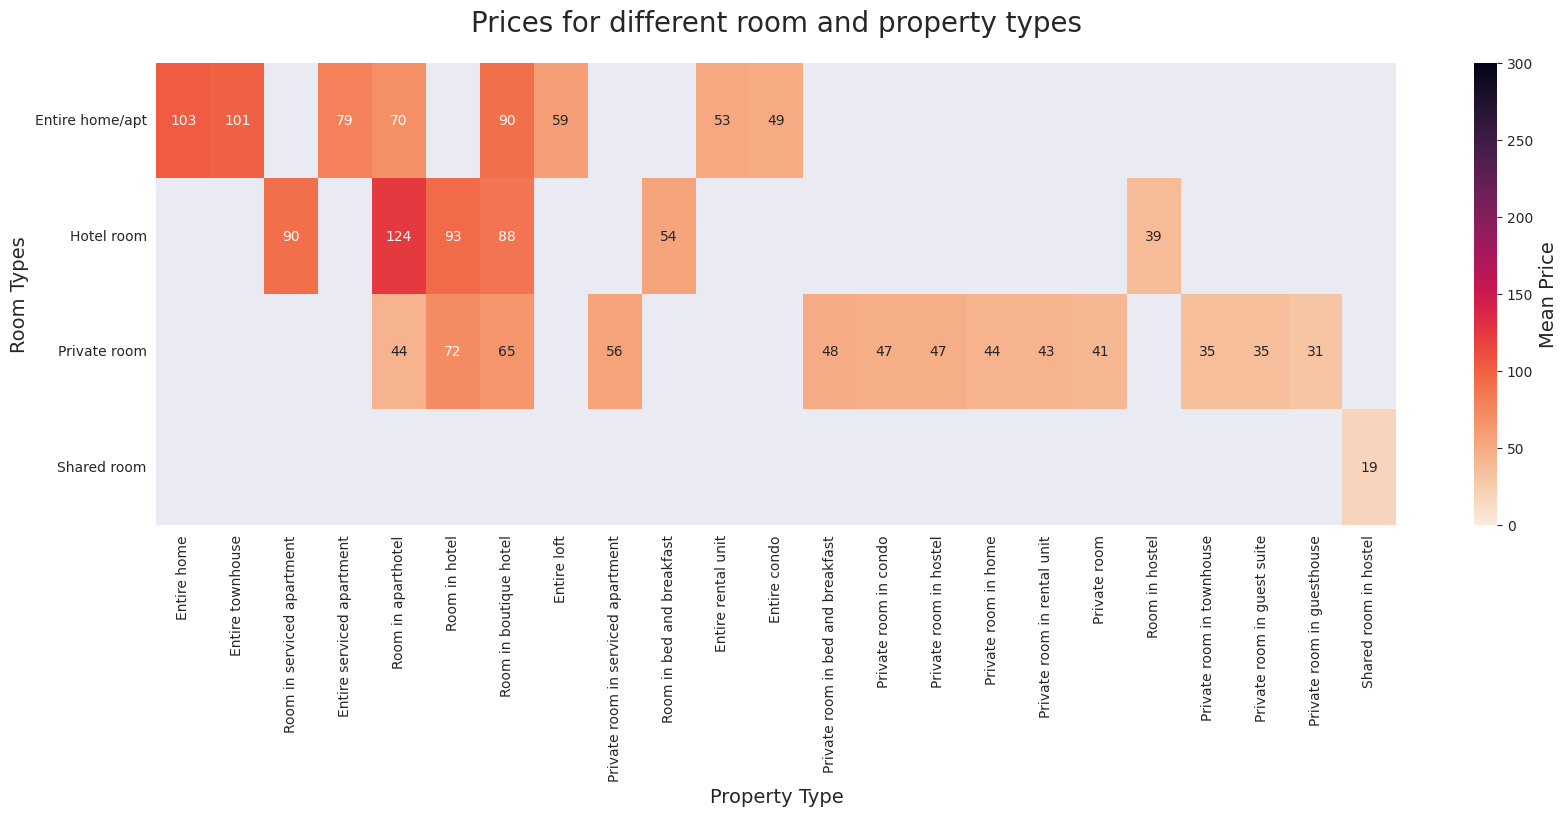

In [ ]:
# Create a pivot table from room type, property types and average price.
room_prop_price = listings_property_mt50.groupby(['room_type', 'property_type']).agg({'price':'mean'}).reset_index()
room_prop_price.columns = ['room_type', 'property_type', 'avg_price']
room_prop_price = room_prop_price.pivot(index='room_type', columns='property_type', values='avg_price')

# Rearrange the columns in descending order of average price
room_prop_price = room_prop_price.reindex(columns=prop_price['prop_type'].to_list())

# Create a heatmap
sns.set_style('dark') 
fig,ax = plt.subplots(figsize=(20,6))
h = sns.heatmap(room_prop_price, vmin=0, vmax=300, cmap='rocket_r', annot=True, fmt='.0f')
h.set_title('Prices for different room and property types',fontsize=20, y=1.05)
h.set_xlabel('Property Type', fontsize=14)
h.set_ylabel('Room Types', fontsize=14)
h.figure.axes[-1].set_ylabel('Mean Price', size=14)
plt.yticks(rotation=0)  # Rotate the labels on y-axis for better view.
plt.show()


# Top 10 neighbourhoods have the most listings count.

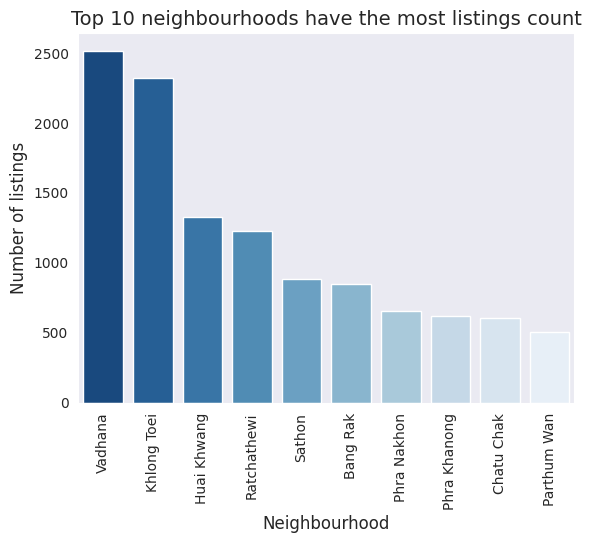

In [ ]:
# Count number of listings by neighbourhood order by listings count, then turn it into the DataFrame for visualization.
top_nbh = listings_simp.groupby('neighbourhood_cleansed')['neighbourhood_cleansed'].count().sort_values(ascending=False).reset_index(name='Count')

# List out top 10 place have the most listings count 
top_10_nbh = top_nbh.head(10)

# Create a barplot of top 10.
p = sns.barplot(data=top_10_nbh, x='neighbourhood_cleansed', y='Count', palette='Blues_r')
p.set_title('Top 10 neighbourhoods have the most listings count',fontsize=14)
p.set_xlabel('Neighbourhood', fontsize=12)
p.set_ylabel('Number of listings', fontsize=12)
plt.xticks(rotation=90)  # Rotate the labels on x-axis for better view.
plt.show()

# Prices across Neighbourhoods.

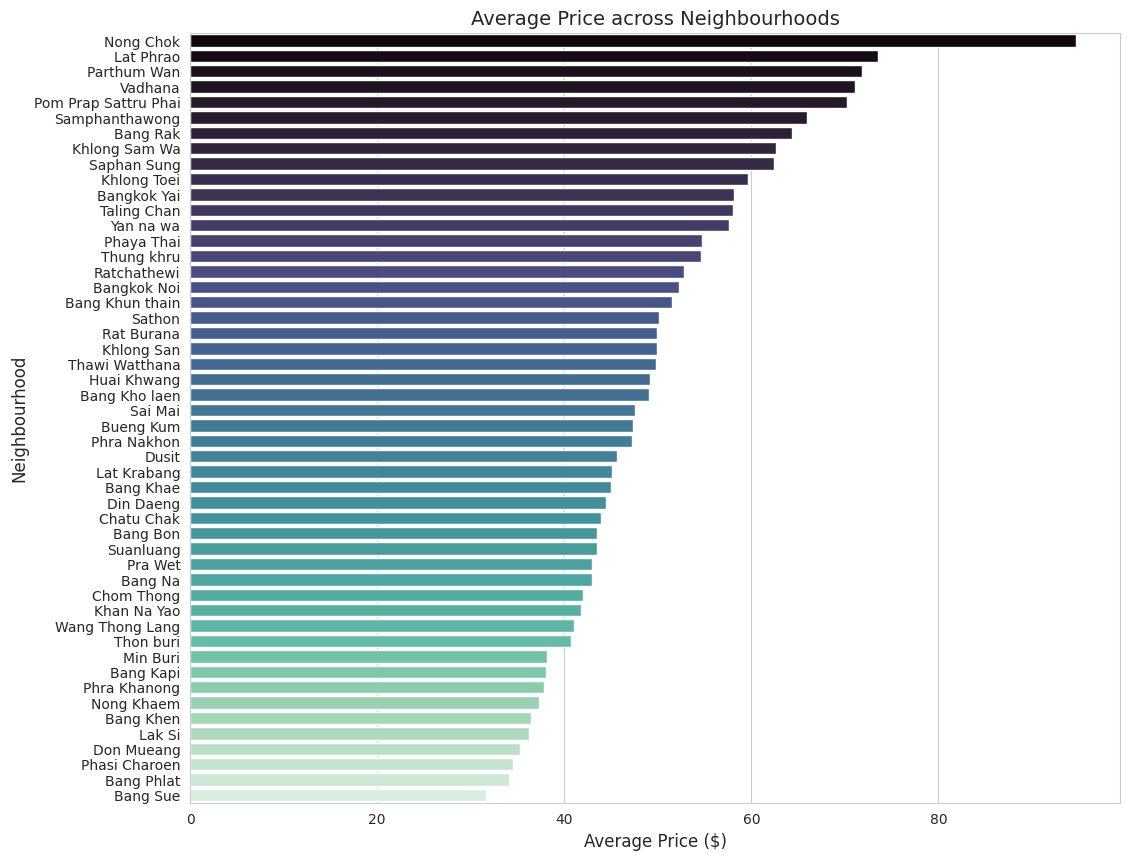

In [ ]:
# Create a DataFrame has average price among neighbourhoods.
nbh_price = listings_price_under_300.groupby('neighbourhood_cleansed').agg({'price':'mean'}).reset_index()
nbh_price.columns = ['neighbourhood', 'avg_price']
nbh_price = nbh_price.sort_values('avg_price', ascending=False)

# Create a barplot that indicates the average price of each property type.
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 10))
nbh_p = sns.barplot(data=nbh_price, y='neighbourhood', x='avg_price', orient='h', palette='mako')
nbh_p.set_title('Average Price across Neighbourhoods',fontsize=14)
nbh_p.set_ylabel('Neighbourhood', fontsize=12)
nbh_p.set_xlabel('Average Price ($)', fontsize=12)
plt.show()

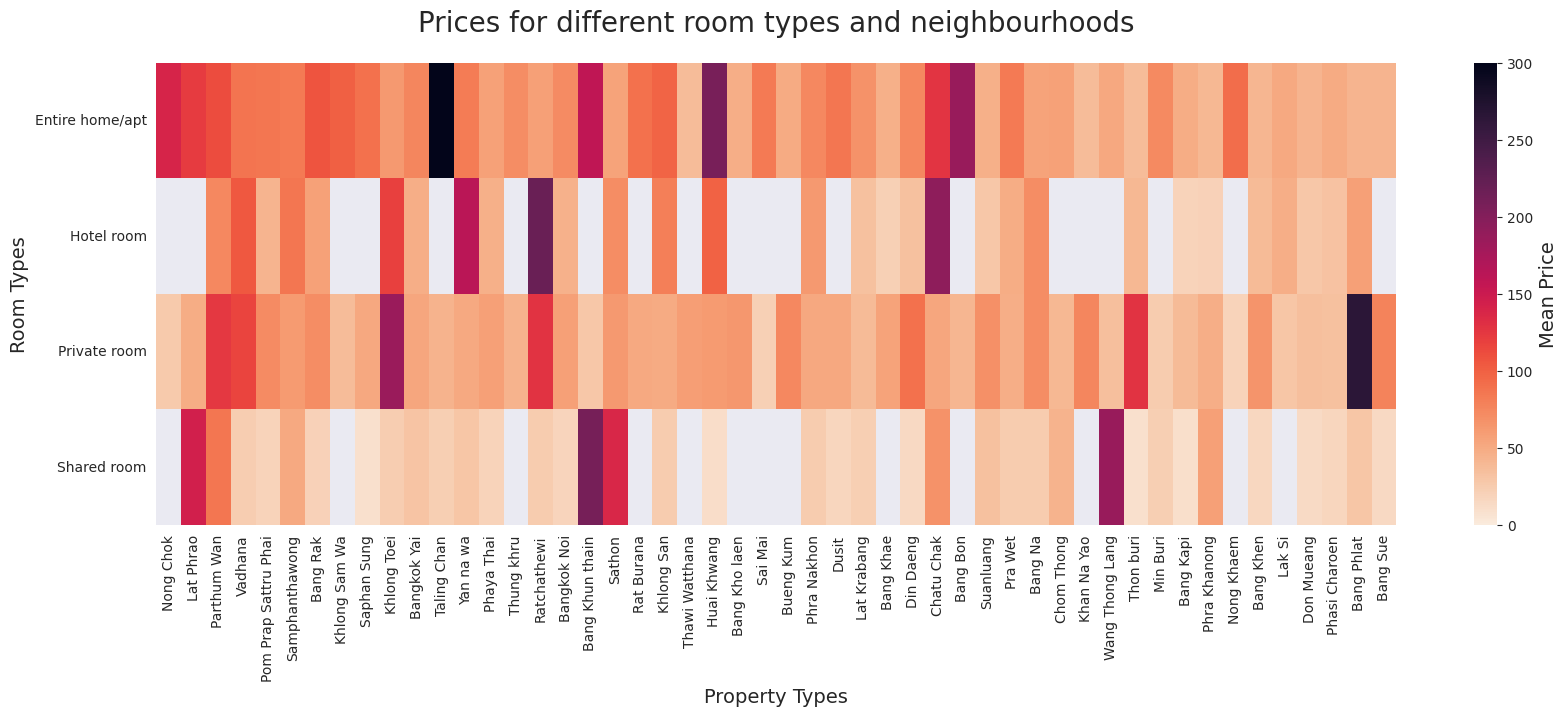

In [ ]:
# Create a pivot table from room type, neighbourhood and average price.
room_nbh_price = listings_simp.groupby(['room_type', 'neighbourhood_cleansed']).agg({'price':'mean'}).reset_index()
room_nbh_price.columns = ['room_type', 'neighbourhood', 'avg_price']
room_nbh_price = room_nbh_price.pivot(index='room_type', columns='neighbourhood', values='avg_price')

# Rearrange columns in descending order of average price.
room_nbh_price = room_nbh_price.reindex(columns=nbh_price['neighbourhood'].to_list())

# Create a heatmap
sns.set_style('dark') 
fig,ax = plt.subplots(figsize=(20,6))
h = sns.heatmap(room_nbh_price, vmin=0, vmax=300, cmap='rocket_r', annot=False, fmt='.0f')
h.set_title('Prices for different room types and neighbourhoods',fontsize=20, y=1.05)
h.set_xlabel('Property Types', fontsize=14)
h.set_ylabel('Room Types', fontsize=14)
h.figure.axes[-1].set_ylabel('Mean Price', size=14)
plt.yticks(rotation=0)  # Rotate the labels on y-axis for better view.
plt.show()


## Find out customer's satisfaction of each room type base on rating scores

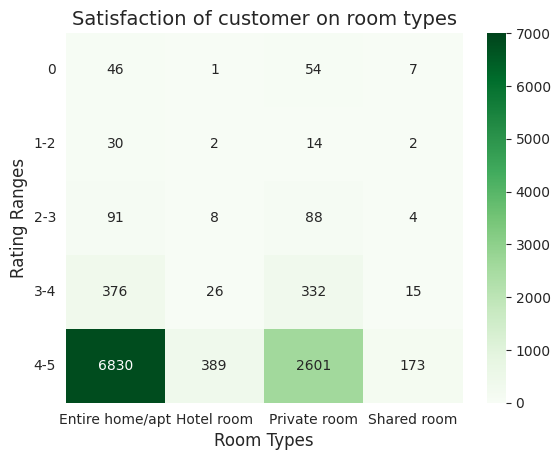

                 review_scores_rating
room_type                            
Entire home/apt              4.646491
Hotel room                   4.651643
Private room                 4.482899
Shared room                  4.469657


In [ ]:
# Create a column names rating_range
label_names = ['0', '1-2', '2-3', '3-4', '4-5']
ranges = [0, 1, 2, 3, 4, 5]
listings_simp['rating_range'] = pd.cut(listings_simp['review_scores_rating'], bins=ranges, labels=label_names)

# Create a pivot table from room type, rating_range and listings count.
rating_per_room_type = listings_simp.groupby(['room_type', 'rating_range'])['rating_range'].count().reset_index(name='Count')
rating_per_room_type = rating_per_room_type.pivot(index='rating_range', columns='room_type', values='Count')

# Create a heatmap 
h = sns.heatmap(rating_per_room_type, vmin=0, vmax=7000, cmap='Greens', annot=True, fmt='d')
h.set_title('Satisfaction of customer on room types',fontsize=14)
h.set_xlabel('Room Types', fontsize=12)
h.set_ylabel('Rating Ranges', fontsize=12)
plt.yticks(rotation=0)  # Rotate the labels on y-axis for better view.
plt.show()

# Calculate the average rating scores of each room types.
avg_scores = listings_simp.groupby('room_type').agg({'review_scores_rating':'mean'})
print(avg_scores)

As can be seen from the heatmap, rating ratio in range 4-5 stars of review rating scores make up about 80-90% in all room types. The average rating scores of Entire home/apt and Hotel room is a little higher than Private and Shared room.

## Find out the number of reviews over the last twelve months

We will use data in the reviews.gz file to get the insights. Firstly, let's clean the dataset.

In [ ]:
# View the summary of null values
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     1
comments         27
dtype: int64

In [ ]:
# View data type of all columns
reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

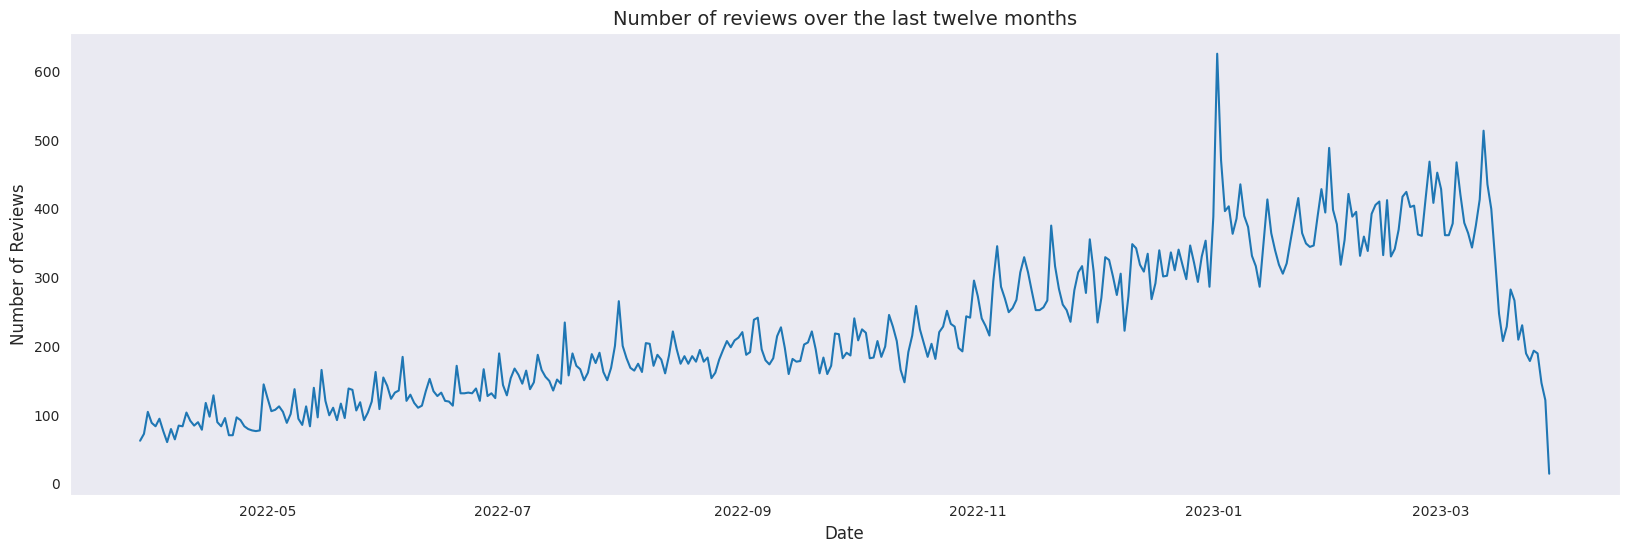

In [ ]:
# Change date column to correct format.
reviews['date'] = pd.to_datetime(reviews['date'])

# Create the DataFrame that contain number of reviews on each day in the last twelve months.
reviews_ltm = reviews.loc[reviews['date'] >= pd.to_datetime('2022-03-29'),:]
reviews_ltm = reviews_ltm.groupby('date')['date'].count().reset_index(name='count')

# Create a lineplot to see the trends.
fig, ax = plt.subplots(figsize=(20,6))
l = sns.lineplot(data=reviews_ltm, x='date', y='count', ax=ax)
l.set_title('Number of reviews over the last twelve months',fontsize=14)
l.set_xlabel('Date', fontsize=12)
l.set_ylabel('Number of Reviews', fontsize=12)
plt.show()

Number is ascending day by day in the last twelve months. In the January of 2023, the number of reviews is suddenly soaring compared to the rest.